In [1223]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

In [1224]:
#np.random.seed(1)

# Load the data

In [1225]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [1226]:
df[df['RAD']==24]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0,0.770,6.112,81.3,2.5091,24,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0,0.770,6.398,88.0,2.5182,24,666.0,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0,0.583,5.871,41.9,3.7240,24,666.0,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0,0.583,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98,19.1


In [1227]:
set(df['RAD'])

{1, 2, 3, 4, 5, 6, 7, 8, 24}

# Artificially removing data

In [1228]:
def f(dic):
    return {key:(np.nan if np.random.rand()<0.2 else value) for key,value in dic.items()}
    return {key:(np.nan if np.random.rand()<0.2*int(key!='MEDV') else value) for key,value in dic.items()}

In [1229]:
df_holes = df.apply(f,axis=1,result_type='expand')
df_holes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,NaN
1,NaN,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,NaN,7.185,61.1,4.9671,2.0,242.0,NaN,NaN,4.03,34.7
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,NaN,222.0,NaN,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,NaN,3.0,222.0,18.7,NaN,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,0.0,NaN,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,NaN,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,NaN
503,NaN,0.0,11.93,0.0,0.573,NaN,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,NaN
504,NaN,0.0,NaN,0.0,0.573,NaN,89.3,2.3889,NaN,NaN,21.0,393.45,6.48,NaN


# Compute correlations and filling

In [1230]:
mean = df_holes.mean()

In [1231]:
cov=np.zeros((len(df_holes.columns),len(df_holes.columns)))
for i,name1 in enumerate(df_holes.columns):
    for j,name2 in enumerate(df_holes.columns):
        cov[i,j]=((df_holes[name1]-mean[name1])*(df_holes[name2]-mean[name2])).mean()


In [1232]:
np.linalg.eigvalsh(cov)

array([2.63180179e-03, 6.30091889e-02, 2.33097042e-01, 1.03184139e+00,
       2.71837926e+00, 9.40827937e+00, 1.30879210e+01, 1.82449661e+01,
       5.43783141e+01, 7.80231323e+01, 2.52835142e+02, 8.11573121e+02,
       6.96870607e+03, 2.95453236e+04])

In [1233]:
cov[:,np.random.randint(0,2,4)].shape

(14, 4)

In [1234]:
def fill_in(X,mean,cov):
    indices=np.isfinite(X)
    return mean+cov[:,indices]@np.linalg.solve(cov[indices][:,indices],X[indices]-mean[indices])

def fill_func(serie):
    return {key:val for key, val in zip(serie.keys(),fill_in(serie.to_numpy(),mean.to_numpy(),cov))}

In [1235]:
df_filled=df_holes.apply(fill_func,axis=1,result_type='expand')
df_filled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,1.800000e+01,2.310000,1.441928e-01,0.53800,6.575000,65.2,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,29.107871
1,0.020839,1.243450e-14,7.070000,-2.636780e-16,0.46900,6.421000,78.9,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,-8.881784e-15,7.070000,-2.081668e-16,0.46066,7.185000,61.1,4.967100,2.000000,242.000000,17.712492,396.274447,4.030000,34.700000
3,0.032370,1.598721e-14,2.180000,9.341036e-02,0.45800,6.998000,45.8,6.062200,4.452568,222.000000,17.756137,394.630000,2.940000,33.400000
4,0.069050,7.105427e-15,2.180000,-2.775558e-16,0.45800,7.147000,54.2,4.275127,3.000000,222.000000,18.700000,393.533291,5.330000,36.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.776231,-3.375078e-14,11.917099,-7.494005e-16,0.57300,6.593000,69.1,2.478600,1.000000,273.000000,21.000000,369.840130,9.670000,22.400000
502,0.045270,1.776357e-15,11.930000,1.665335e-16,0.57300,6.120000,76.7,2.287500,1.000000,273.000000,21.000000,396.900000,9.080000,22.215339
503,-1.463981,-2.131628e-14,11.930000,-3.330669e-16,0.57300,6.607362,91.0,2.167500,1.000000,273.000000,21.000000,396.900000,5.640000,26.960322
504,4.190421,-1.776357e-15,14.106489,6.383782e-16,0.57300,6.611115,89.3,2.388900,12.364417,457.392914,21.000000,393.450000,6.480000,26.871627


In [1270]:
(df_filled-df).abs().sum()/df.std()*100/(df_holes.isna()).sum()

CRIM       31.561504
ZN         52.591258
INDUS      39.460957
CHAS       45.632705
NOX        45.143145
RM         52.005249
AGE        47.200986
DIS        38.945995
RAD        39.195520
TAX        29.193992
PTRATIO    61.067832
B          52.294875
LSTAT      45.079153
MEDV       40.526623
dtype: float64

# Fill with mean

In [1236]:
df_mean_filled = df_holes.fillna(df_holes.mean())

In [1237]:
(df_filled-df).abs().max()

CRIM        28.102457
ZN          46.119547
INDUS       16.243097
CHAS         0.881702
NOX          0.241847
RM           2.881175
AGE         48.105385
DIS          4.174737
RAD         17.607473
TAX        265.675026
PTRATIO      4.580812
B          315.144812
LSTAT       17.610803
MEDV        26.314285
dtype: float64

In [1263]:
(df_mean_filled-df).abs().mean()-(df_filled-df).abs().mean()

CRIM        0.411906
ZN          0.828475
INDUS       0.708593
CHAS       -0.000126
NOX         0.010867
RM          0.034646
AGE         2.395519
DIS         0.195757
RAD         0.943953
TAX        19.179453
PTRATIO     0.103257
B           0.877770
LSTAT       0.504213
MEDV        0.651051
dtype: float64

mean fill is better for error here

# Remove na

In [1239]:
df_remove=df_holes.dropna()

# Iterative imputation

In [1240]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
df_iter = imp.fit_transform(df_holes.to_numpy())
df_iter=pd.DataFrame(df_iter,columns=df.columns)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [1269]:
(df_iter-df).abs().sum()/df.std()*100/(df_holes.isna()).sum()

CRIM       30.693373
ZN         57.052132
INDUS      41.011280
CHAS       45.795452
NOX        45.058989
RM         49.932297
AGE        48.343179
DIS        43.384380
RAD        40.495371
TAX        29.844288
PTRATIO    60.522719
B          52.752691
LSTAT      46.951219
MEDV       44.764180
dtype: float64

# Nearest neighbor

In [1242]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_knn = imputer.fit_transform(df_holes.to_numpy())
df_knn=pd.DataFrame(df_knn,columns=df.columns)
df_knn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.0,2.31,0.0,0.538,6.5750,65.2,4.0900,1.0,296.0,15.3,396.900,4.980,23.25
1,0.258500,0.0,7.07,0.0,0.469,6.4210,78.9,4.9671,2.0,242.0,17.8,396.900,9.140,21.60
2,0.027290,0.0,7.07,0.0,0.449,7.1850,61.1,4.9671,2.0,242.0,18.5,393.725,4.030,34.70
3,0.032370,0.0,2.18,0.0,0.458,6.9980,45.8,6.0622,5.0,222.0,20.2,394.630,2.940,33.40
4,0.069050,0.0,2.18,0.0,0.458,7.1470,54.2,5.8386,3.0,222.0,18.7,394.720,5.330,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.141320,0.0,13.48,0.0,0.573,6.5930,69.1,2.4786,1.0,273.0,21.0,369.250,9.670,22.40
502,0.045270,0.0,11.93,0.0,0.573,6.1200,76.7,2.2875,1.0,273.0,21.0,396.900,9.080,22.05
503,0.140925,0.0,11.93,0.0,0.573,6.3995,91.0,2.1675,1.0,273.0,21.0,396.900,5.640,23.30
504,4.647715,0.0,18.10,0.0,0.573,7.6465,89.3,2.3889,14.5,666.0,21.0,393.450,6.480,21.05


In [1268]:
(df_knn-df).abs().sum()/df.std()*100/(df_holes.isna()).sum()

CRIM       27.780712
ZN         42.431503
INDUS      34.496822
CHAS       36.454632
NOX        41.794228
RM         74.594685
AGE        43.692561
DIS        41.188993
RAD        20.781784
TAX        22.234840
PTRATIO    42.356724
B          53.015952
LSTAT      53.186107
MEDV       47.162930
dtype: float64

# Downstream task

In [1244]:

def pipeline(df_used):
    models = {'Linear Regression':LinearRegression(), 
            'Decision Tree':DecisionTreeRegressor(), 
            'Random Forest':RandomForestRegressor(), 
            'Support Vector Regression':SVR(), 
            'KNeighbors Regression':KNeighborsRegressor(), 
            'Gradient Boosting Regression':GradientBoostingRegressor()
    }
    features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    X = df_used.loc[:,features]
    y = df['MEDV'].loc[df_used.index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    performances = {}

    # Train the models and evaluate their performances
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate the performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store the performance metrics in the dictionary
        performances[name] = [mae, mse, r2]
    return performances
        

In [1245]:
res={}
for name,dataframe in zip(['full','gaussian_filled','iteratively_filled','Nearest_neighbor','mean_filled','dropped'],[df,df_filled,df_iter,df_knn,df_mean_filled,df_remove]):
    try:
        res[name]=pipeline(dataframe)
    except:
        res[name]={name:[np.nan,np.nan,np.nan] for name in ['Linear Regression','Decision Tree','Random Forest','Support Vector Regression','KNeighbors Regression','Gradient Boosting Regression']}


In [1246]:
performances={key:{} for key in res['full'].keys()}
for df_name,perfs in res.items():
    for model_name in performances.keys():
        performances[model_name][df_name]=perfs[model_name]

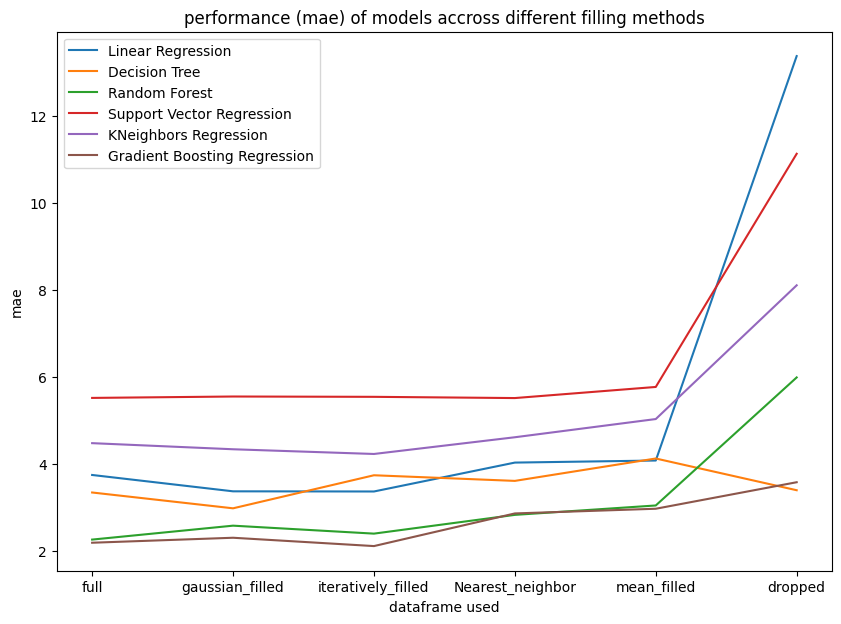

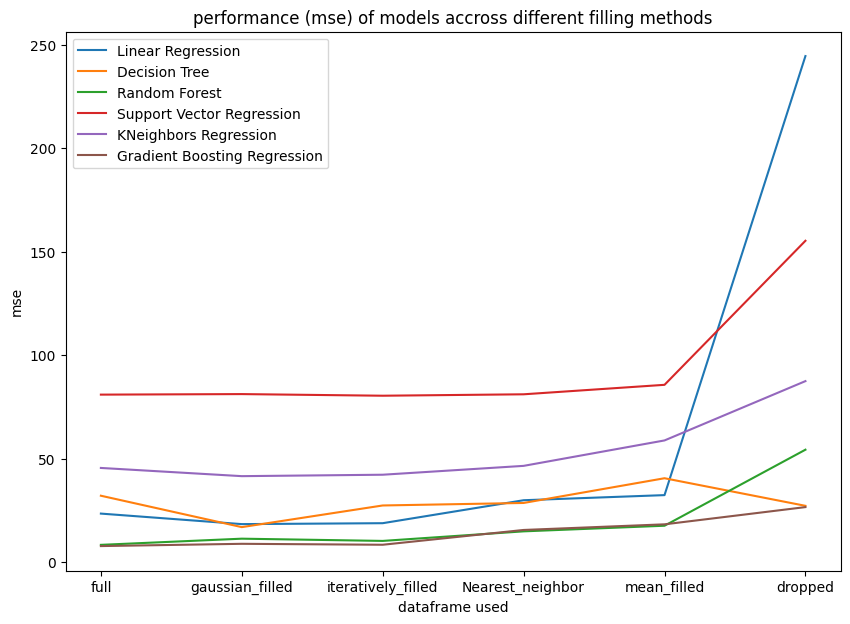

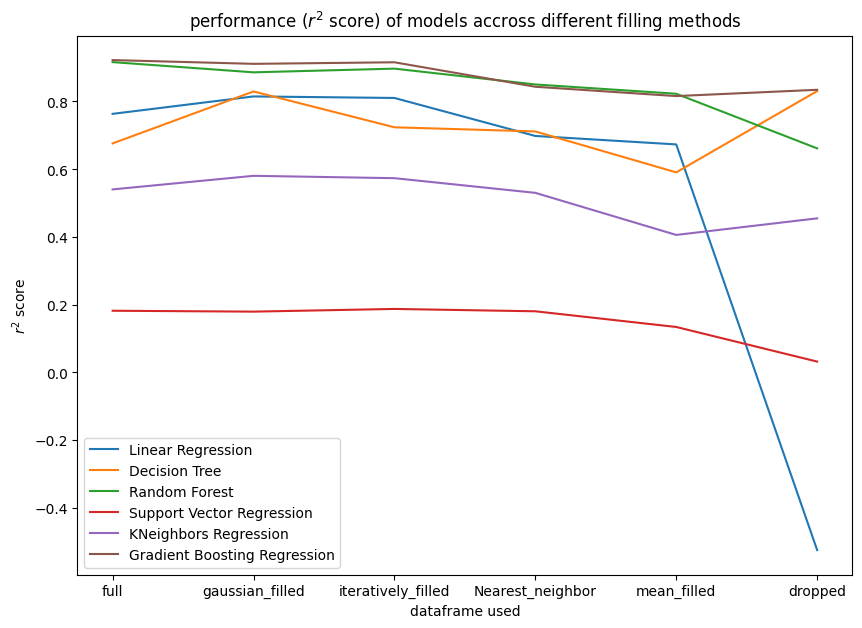

In [1247]:
for i,score_name in enumerate(['mae','mse','$r^2$ score']):
    plt.figure(figsize=(10,7))
    dataframes=list(performances['Linear Regression'].keys())
    for model_name,perfs in performances.items():
        plt.plot(dataframes,[perfs[dataframe][i] for dataframe in dataframes],label=model_name)
    plt.legend()
    plt.title(f'performance ({score_name}) of models accross different filling methods')
    plt.xlabel('dataframe used')
    plt.ylabel(score_name)
plt.show()

In [1248]:
maes={key:[value[val][0] for val in performances['Linear Regression'].keys()] for key,value in performances.items()}

dfmaes=pd.DataFrame(maes,index=performances['Linear Regression'].keys())
dfmaes.to_csv(f'maes_{np.random.rand()}.csv')

mses={key:[value[val][1] for val in performances['Linear Regression'].keys()] for key,value in performances.items()}

dfmses=pd.DataFrame(mses,index=performances['Linear Regression'].keys())
dfmses.to_csv(f'mses_{np.random.rand()}.csv')

r2={key:[value[val][2] for val in performances['Linear Regression'].keys()] for key,value in performances.items()}

dfr2=pd.DataFrame(r2,index=performances['Linear Regression'].keys())
dfr2.to_csv(f'r2_{np.random.rand()}.csv')

In [1256]:
from glob import glob

dfsmaes = [pd.read_csv(path,index_col=0) for path in glob('maes_*.csv')]
dfmae=dfsmaes[0]
for d in dfsmaes[1:]:
    dfmae=d+dfmae
dfmae=dfmae/len(dfsmaes)

dfsmses = [pd.read_csv(path,index_col=0) for path in glob('mses_*.csv')]
dfmse=dfsmses[0]
for d in dfsmses[1:]:
    dfmse=d+dfmse
dfmse=dfmse/len(dfsmses)

dfsr2 = [pd.read_csv(path,index_col=0) for path in glob('r2_*.csv')]
dfr2=dfsr2[0]
for d in dfsr2[1:]:
    dfr2=d+dfr2
dfr2=dfr2/len(dfsr2)
dfr2

,Linear Regression,Decision Tree,Random Forest,Support Vector Regression,KNeighbors Regression,Gradient Boosting Regression
full,0.763417,0.781625,0.911946,0.181572,0.540161,0.921636
gaussian_filled,0.789026,0.757945,0.879750,0.188196,0.437872,0.888820
iteratively_filled,0.799225,0.759314,0.881698,0.193461,0.443696,0.891559
Nearest_neighbor,0.712915,0.641416,0.832035,0.187952,0.437481,0.840237
mean_filled,0.658044,0.612933,0.798684,0.150862,0.315574,0.805991
dropped,-52.664850,-5.590532,-0.437679,-0.310291,-0.101213,-0.679118


In [1260]:
dfr2.loc['dropped','Linear Regression']=np.nan
dfr2.loc['dropped','Decision Tree']=np.nan
dfmse.loc['dropped','Linear Regression']=np.nan
dfmae.loc['dropped','Linear Regression']=np.nan

In [1258]:
dfr2

,Linear Regression,Decision Tree,Random Forest,Support Vector Regression,KNeighbors Regression,Gradient Boosting Regression
full,0.763417,0.781625,0.911946,0.181572,0.540161,0.921636
gaussian_filled,0.789026,0.757945,0.879750,0.188196,0.437872,0.888820
iteratively_filled,0.799225,0.759314,0.881698,0.193461,0.443696,0.891559
Nearest_neighbor,0.712915,0.641416,0.832035,0.187952,0.437481,0.840237
mean_filled,0.658044,0.612933,0.798684,0.150862,0.315574,0.805991
dropped,NaN,-5.590532,-0.437679,-0.310291,-0.101213,-0.679118


In [1250]:
dfr2.index

Index(['full', 'gaussian_filled', 'iteratively_filled', 'Nearest_neighbor',
       'mean_filled', 'dropped'],
      dtype='object')

In [1251]:
dfr2.loc['full']['Linear Regression']

0.763417443213845

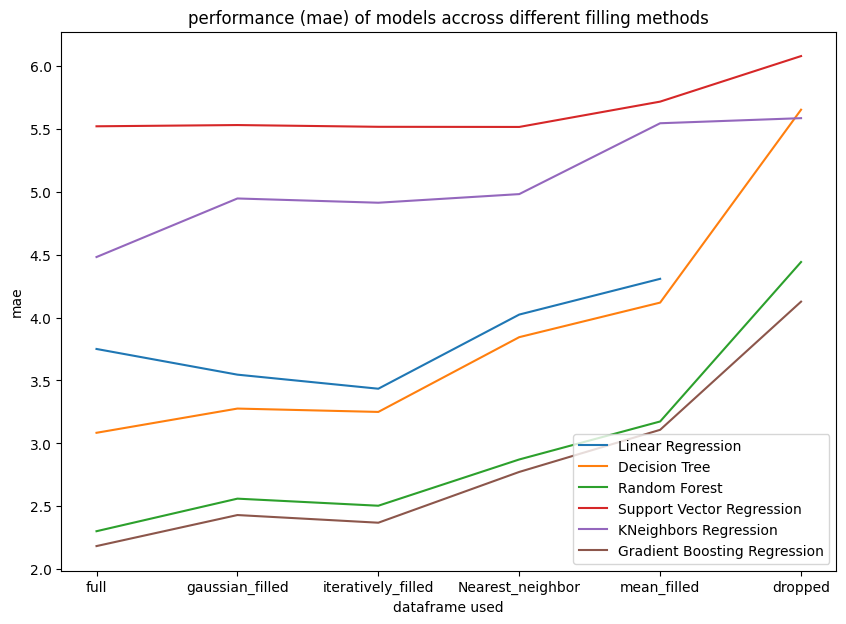

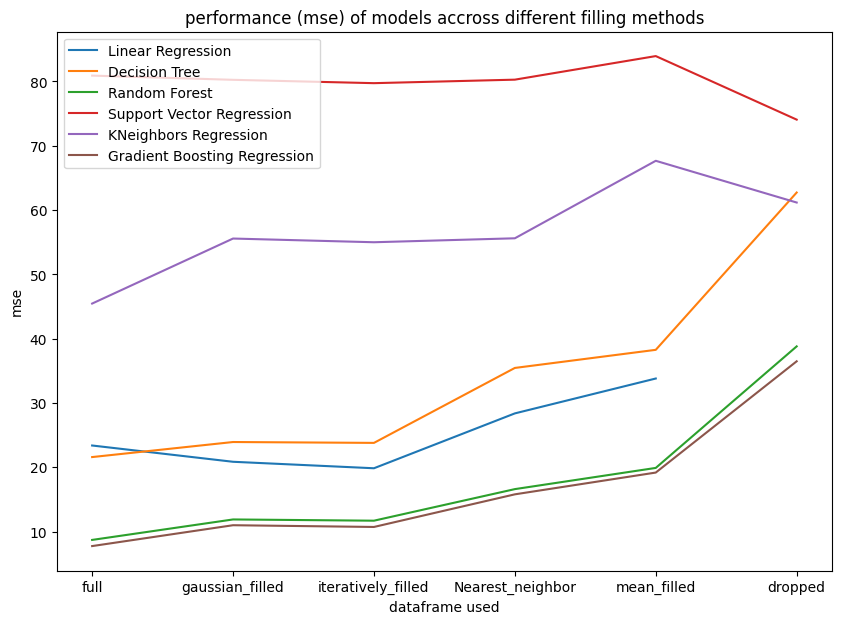

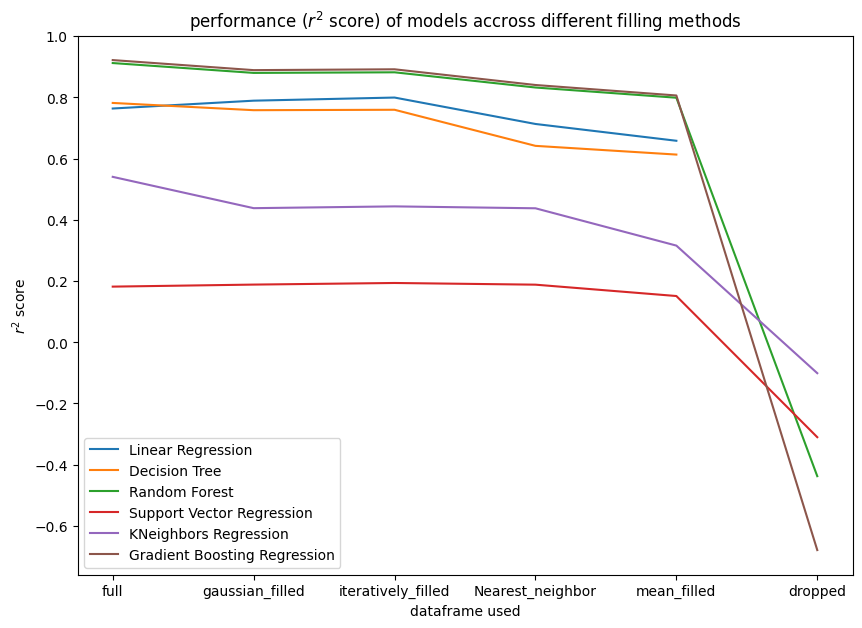

In [1261]:
for score_name,errors in zip(['mae','mse','$r^2$ score'],[dfmae,dfmse,dfr2]):
    plt.figure(figsize=(10,7))
    dataframes=list(dfr2.index)
    for model_name in errors.columns:
        plt.plot(dataframes,[errors.loc[dataframe][model_name] for dataframe in dataframes],label=model_name)
    plt.legend()
    plt.title(f'performance ({score_name}) of models accross different filling methods')
    plt.xlabel('dataframe used')
    plt.ylabel(score_name)
plt.show()